# DA Final project:

# Group 9

# Going Of The Rails

###  Name of students:
Oz Nissenboim<br>
Yuval Lebel<br>
Uri Iron<br>
Roy binyamini


<a id='top'></a>

<div>
<img src="https://github.com/guzua/Railroad-Accident/blob/main/%D7%A4%D7%AA%D7%99%D7%97%D7%AA%20%D7%A4%D7%A8%D7%95%D7%99%D7%99%D7%A7%D7%98.jpg?raw=true" width="800"/>
</div>


<b id="Top"> </b>  

1. [Relevant libraries](#1)
2. [dtypes & info](#2)
3. [Noisy data](#3)
4. [conditional selection](#4)


---

<div style="color:white;display:fill;border-radius:100px;
            background-color:#03112A;font-size:10%; 
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;text-align: center;color:white; border-radius: 5px; padding-top: 5px; padding-bottom: 10px;"><b><b><span style='color:#2ae4f5''></span></b>   </b></p>
</div>

# <b id="section_2">  </b> <b style='color:#F05454'>1. Relevant libraries </b> <b></b> 

<div style="color:white;display:fill;border-radius:100px;
            background-color:#03112A;font-size:10%; 
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;text-align: center;color:white; border-radius: 5px; padding-top: 5px; padding-bottom: 10px;"><b><b><span style='color:#2ae4f5''></span></b>   </b></p>
</div>

In [1]:
#!pip install geopandas
#!pip install folium
import pandas as pd
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import requests
from IPython.display import Image


<div style="color:white;display:fill;border-radius:100px;
            background-color:#03112A;font-size:10%; 
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;text-align: center;color:white; border-radius: 5px; padding-top: 5px; padding-bottom: 10px;"><b><b><span style='color:#2ae4f5''></span></b>   </b></p>
</div>

# <b id="section_2">  </b> <b style='color:#F05454'>2. dtypes & info </b> <b></b> 

<div style="color:white;display:fill;border-radius:100px;
            background-color:#03112A;font-size:10%; 
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;text-align: center;color:white; border-radius: 5px; padding-top: 5px; padding-bottom: 10px;"><b><b><span style='color:#2ae4f5''></span></b>   </b></p>
</div>

#### Information on the data
The target of our project is to minimize frequencies of railway accidents. <br>taken from [Kaggle](https://www.kaggle.com/datasets/chrico03/railroad-accident-and-incident-data)

In [2]:
url = 'https://raw.githubusercontent.com/guzua/Railroad-Accident/main/newfile_selected.csv'
GOTR_DF = pd.read_csv(url)
GOTR_DF.shape

(46442, 18)

In [3]:
GOTR_DF.columns

Index(['Weather Condition', 'Total Persons Killed', 'Total Persons Injured',
       'Report Year', 'Accident Type', 'Accident Month',
       'Primary Accident Cause', 'Train Speed', 'Positive Drug Tests',
       'State Name', 'Passengers Transported', 'Positive Alcohol Tests',
       'Longitude', 'Latitude', 'Maintenance Railroad Holding Company',
       'Train Direction', 'Time', 'Total Damage Cost'],
      dtype='object')

In [7]:
GOTR_DF.drop_duplicates(subset=['Time','Total Damage Cost','Accident Type','Primary Accident Cause','Positive Alcohol Tests','Weather Condition','Accident Month','Longitude','Latitude','Train Direction'], inplace=True) #E
GOTR_DF.shape

(42368, 18)

In [8]:
GOTR_DF

,Weather Condition,Total Persons Killed,Total Persons Injured,Report Year,Accident Type,Accident Month,Primary Accident Cause,Train Speed,Positive Drug Tests,State Name,Passengers Transported,Positive Alcohol Tests,Longitude,Latitude,Maintenance Railroad Holding Company,Train Direction,Time,Total Damage Cost
0,Clear,0.0,0.0,2017.0,Derailment,6.0,Switch point worn or broken,10.0,0.0,ILLINOIS,Yes,0.0,-87.623003,41.884035,Not Assigned,North,2:14 PM,"132,013"
1,Clear,0.0,0.0,2017.0,Derailment,6.0,Switch point worn or broken,0.0,NaN,ILLINOIS,NaN,NaN,-87.623003,41.884035,Not Assigned,North,2:14 PM,"132,013"
2,Cloudy,0.0,0.0,2007.0,Derailment,1.0,Switch damaged or out of adjustment,4.0,NaN,LOUISIANA,No,NaN,0.000000,0.000000,Not Assigned,South,7:10 AM,"9,986"
3,Clear,0.0,1.0,2017.0,Hwy-rail crossing,10.0,Highway user deliberately disregarded crossing...,0.0,NaN,ILLINOIS,No,NaN,-87.906206,41.054254,Canadian National - North America,South,3:55 AM,"13,231"
4,Rain,0.0,0.0,2017.0,Derailment,10.0,"Shoving movement, absence of man on or at lead...",3.0,0.0,ILLINOIS,No,0.0,-87.900664,41.122308,Norfolk Southern Railway Company,West,6:00 AM,"148,289"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46437,Clear,0.0,0.0,2017.0,Raking collision,6.0,Yard skate slid and failed to stop cars,3.0,NaN,ILLINOIS,No,NaN,-98.147175,39.596277,Union Pacific Railroad Company,West,4:30 PM,"13,216"
46438,Cloudy,0.0,0.0,2016.0,Derailment,12.0,Failure to comply with restricted speed or its...,9.0,NaN,ILLINOIS,No,NaN,-88.090050,41.480598,Union Pacific Railroad Company,North,1:40 AM,"61,267"
46439,Cloudy,0.0,0.0,2016.0,Derailment,12.0,Failure to comply with restricted speed or its...,5.0,NaN,ILLINOIS,No,NaN,-88.090050,41.480598,Union Pacific Railroad Company,South,1:40 AM,"61,267"
46440,Cloudy,0.0,0.0,2017.0,Derailment,2.0,Failure to release hand brakes on car(s) (rail...,30.0,0.0,ILLINOIS,No,0.0,-90.088857,38.818297,Union Pacific Railroad Company,South,3:19 AM,"98,424"


### 1. Wrangling data

In [9]:
GOTR_DF.isnull().sum()

Weather Condition                           2
Total Persons Killed                        0
Total Persons Injured                       0
Report Year                                 0
Accident Type                               1
Accident Month                              0
Primary Accident Cause                      0
Train Speed                                 0
Positive Drug Tests                     29281
State Name                                  0
Passengers Transported                   2943
Positive Alcohol Tests                  29434
Longitude                                   0
Latitude                                   16
Maintenance Railroad Holding Company       44
Train Direction                          2825
Time                                        0
Total Damage Cost                           0
dtype: int64

In [10]:
GOTR_DF['Positive Alcohol Tests'].fillna(0, inplace=True)
GOTR_DF['Positive Drug Tests'].fillna(0, inplace=True)
GOTR_DF['Maintenance Railroad Holding Company'].fillna('UNREPORTED', inplace=True)
GOTR_DF['Train Direction'].fillna('UNREPORTED', inplace=True)

GOTR_DF.dtypes



Weather Condition                        object
Total Persons Killed                    float64
Total Persons Injured                   float64
Report Year                             float64
Accident Type                            object
Accident Month                          float64
Primary Accident Cause                   object
Train Speed                             float64
Positive Drug Tests                     float64
State Name                               object
Passengers Transported                   object
Positive Alcohol Tests                  float64
Longitude                               float64
Latitude                                float64
Maintenance Railroad Holding Company     object
Train Direction                          object
Time                                     object
Total Damage Cost                        object
dtype: object

In [11]:
GOTR_DF['Total Persons Killed'] = GOTR_DF['Total Persons Killed'].astype(int)
GOTR_DF['Accident Month'] = GOTR_DF['Accident Month'].astype(int)
GOTR_DF['Total Persons Injured'] = GOTR_DF['Total Persons Injured'].astype(int)
GOTR_DF['Report Year'] = GOTR_DF['Report Year'].astype(int)          
GOTR_DF['Total Damage Cost'] = GOTR_DF['Total Damage Cost'].astype(str).str.replace(',', '', regex = False)# cleaning commas in the data
GOTR_DF['Total Damage Cost'] = GOTR_DF['Total Damage Cost'].astype(int)
#GOTR_DF['Train Speed'] = GOTR_DF['Train Speed'] * 1.60934 ##m/h to km/h

GOTR_DF.dtypes


Weather Condition                        object
Total Persons Killed                      int32
Total Persons Injured                     int32
Report Year                               int32
Accident Type                            object
Accident Month                            int32
Primary Accident Cause                   object
Train Speed                             float64
Positive Drug Tests                     float64
State Name                               object
Passengers Transported                   object
Positive Alcohol Tests                  float64
Longitude                               float64
Latitude                                float64
Maintenance Railroad Holding Company     object
Train Direction                          object
Time                                     object
Total Damage Cost                         int32
dtype: object

### [▲](#Top)
---

# Noisy data
#### Checking that these variables are within a reasonable range with Boxplot

<div style="color:white;display:fill;border-radius:100px;
            background-color:#03112A;font-size:10%; 
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;text-align: center;color:white; border-radius: 5px; padding-top: 5px; padding-bottom: 10px;"><b><b><span style='color:#2ae4f5''></span></b>   </b></p>
</div>

# <b id="section_2">  </b> <b style='color:#F05454'>3. Noisy data </b> <b></b> 


# numerical analysis or visualizations


<div style="color:white;display:fill;border-radius:100px;
            background-color:#03112A;font-size:10%; 
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;text-align: center;color:white; border-radius: 5px; padding-top: 5px; padding-bottom: 10px;"><b><b><span style='color:#2ae4f5''></span></b>   </b></p>
</div>

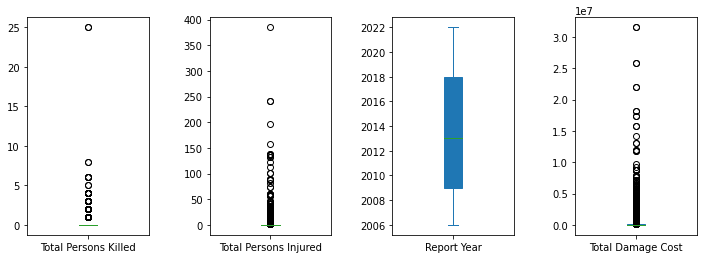

In [13]:
columns_of_interest = ["Total Persons Killed","Total Persons Injured","Report Year","Total Damage Cost"]
Reasonable_Range= GOTR_DF.filter(columns_of_interest).select_dtypes(include=np.number)

# ציור תרשימי Box plot
Reasonable_Range.plot(subplots=True, layout=(1, len(columns_of_interest)), kind='box', figsize=(12, 4), patch_artist=True)
plt.subplots_adjust(wspace=0.5)
plt.show()

<div style="color:white;display:fill;border-radius:100px;
            background-color:#03112A;font-size:10%; 
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;text-align: center;color:white; border-radius: 5px; padding-top: 5px; padding-bottom: 10px;"><b><b><span style='color:#2ae4f5''></span></b>   </b></p>
</div>

# <b id="section_2">  </b> <b style='color:#F05454'>4. New column </b> <b></b> 

#### Adding new column


In [14]:

seasons = {
    1: 'Winter',
    2: 'Winter',
    3: 'Spring',
    4: 'Spring',
    5: 'Spring',
    6: 'Summer',
    7: 'Summer',
    8: 'Summer',
    9: 'Autumn',
    10: 'Autumn',
    11: 'Autumn',
    12: 'Winter'}
GOTR_DF['Season'] = GOTR_DF['Accident Month'].apply(lambda x: seasons[x])


In [15]:
GOTR_DF['Accident Month']

0         6
1         6
2         1
3        10
4        10
         ..
46437     6
46438    12
46439    12
46440     2
46441     6
Name: Accident Month, Length: 42368, dtype: int32

In [16]:
GOTR_DF['Season']

0        Summer
1        Summer
2        Winter
3        Autumn
4        Autumn
          ...  
46437    Summer
46438    Winter
46439    Winter
46440    Winter
46441    Summer
Name: Season, Length: 42368, dtype: object

<div style="color:white;display:fill;border-radius:100px;
            background-color:#03112A;font-size:10%; 
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;text-align: center;color:white; border-radius: 5px; padding-top: 5px; padding-bottom: 10px;"><b><b><span style='color:#2ae4f5''></span></b>   </b></p>
</div>

>x: seasons[x])
```

1. **Dictionary `seasons`:**
   - This dictionary maps each month number (1 to 12) to its corresponding season.

2. **`GOTR_DF['Accident Month'].apply(lambda x: seasons[x])`:**
   - This line creates a new column named 'Season' in the DataFrame `GOTR_DF`.
   - The 'Accident Month' column is used as input to the `apply` method, which applies a lambda function to each element of the 'Accident Month' column.
   - The lambda function looks up the month in the `seasons` dictionary and assigns the corresponding season to each month.

As a result, the DataFrame `GOTR_DF` now has a new column 'Season' that categorizes each accident month into one of the four seasons: Winter, Spring, Summer, or Autumn, based on the mapping provided in the `seasons` dictionary.

<div style="color:white;display:fill;border-radius:100px;
            background-color:#03112A;font-size:10%; 
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;text-align: center;color:white; border-radius: 5px; padding-top: 5px; padding-bottom: 10px;"><b><b><span style='color:#2ae4f5''></span></b>   </b></p>
</div>

# <b id="section_2">  </b> <b style='color:#F05454'>5. Focus on data location </b> <b></b> 

<div style="color:white;display:fill;border-radius:100px;
            background-color:#03112A;font-size:10%; 
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;text-align: center;color:white; border-radius: 5px; padding-top: 5px; padding-bottom: 10px;"><b><b><span style='color:#2ae4f5''></span></b>   </b></p>
</div>

#### the study area

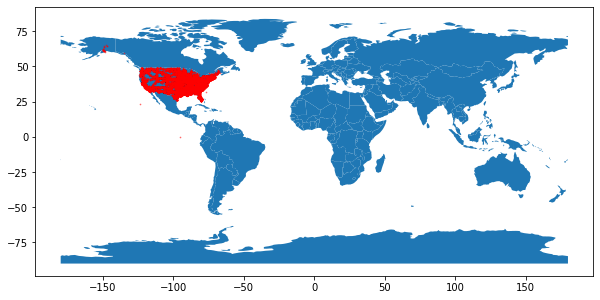

In [17]:
GOTR_DF['Longitude'] = GOTR_DF.loc[(GOTR_DF['Longitude'] < -50) & (GOTR_DF['Longitude'] > -200), 'Longitude']
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf = gpd.GeoDataFrame(GOTR_DF, geometry=gpd.points_from_xy(GOTR_DF.Longitude, GOTR_DF.Latitude))
fig, ax = plt.subplots(figsize=(10, 6))
world.plot(ax=ax)
gdf.plot(ax=ax, markersize=0.5,marker='o', color='red', alpha=0.5)
plt.show()


C:\Users\razel\AppData\Local\Programs\Python\Python310\lib\site-packages\shapely\predicates.py:946: RuntimeWarning: invalid value encountered in within
  return lib.within(a, b, **kwargs)


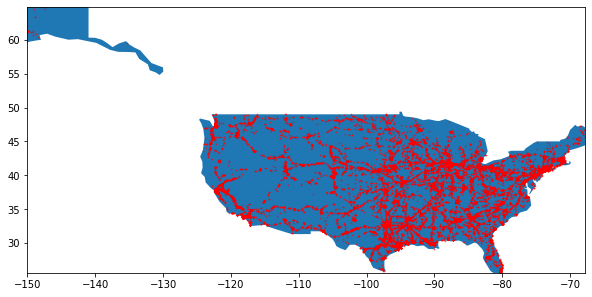

In [18]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the world map shapefile
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Create a geopandas DataFrame with your data
# Assuming you have a DataFrame named 'NewworkYear' with latitude in column 'Latitude' and longitude in column 'Longitude'
gdf = gpd.GeoDataFrame(GOTR_DF, geometry=gpd.points_from_xy(GOTR_DF.Longitude, GOTR_DF.Latitude))

# Filter the world map to include only the USA region
usa = world[world['iso_a3'] == 'USA']

# Filter the data points within the USA region
gdf_usa = gdf[gdf.within(usa.geometry.iloc[0])]

# Check if there are valid data points within the USA region
if not gdf_usa.empty:
    # Calculate the bounding box using the valid data points within the USA region
    usa_bounds = gdf_usa.total_bounds

    # Set the plot limits to focus on the USA region
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.set_xlim(usa_bounds[0], usa_bounds[2])
    ax.set_ylim(usa_bounds[1], usa_bounds[3])

    # Plot the USA region and your data points
    usa.plot(ax=ax)
    gdf_usa.plot(ax=ax, markersize=0.5, color='red', alpha=0.6)

    plt.show()
else:
    print("No valid data points within the USA region.")


We can see in the picture the locations of our accidents across the US

<div style="color:white;display:fill;border-radius:100px;
            background-color:#03112A;font-size:10%; 
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;text-align: center;color:white; border-radius: 5px; padding-top: 5px; padding-bottom: 10px;"><b><b><span style='color:#2ae4f5''></span></b>   </b></p>
</div>

# <b id="section_2">  </b> <b style='color:#F05454'>6  Focus on a specific column  </b> <b></b> 

<div style="color:white;display:fill;border-radius:100px;
            background-color:#03112A;font-size:10%; 
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;text-align: center;color:white; border-radius: 5px; padding-top: 5px; padding-bottom: 10px;"><b><b><span style='color:#2ae4f5''></span></b>   </b></p>
</div>

### Analysis of types of accidents

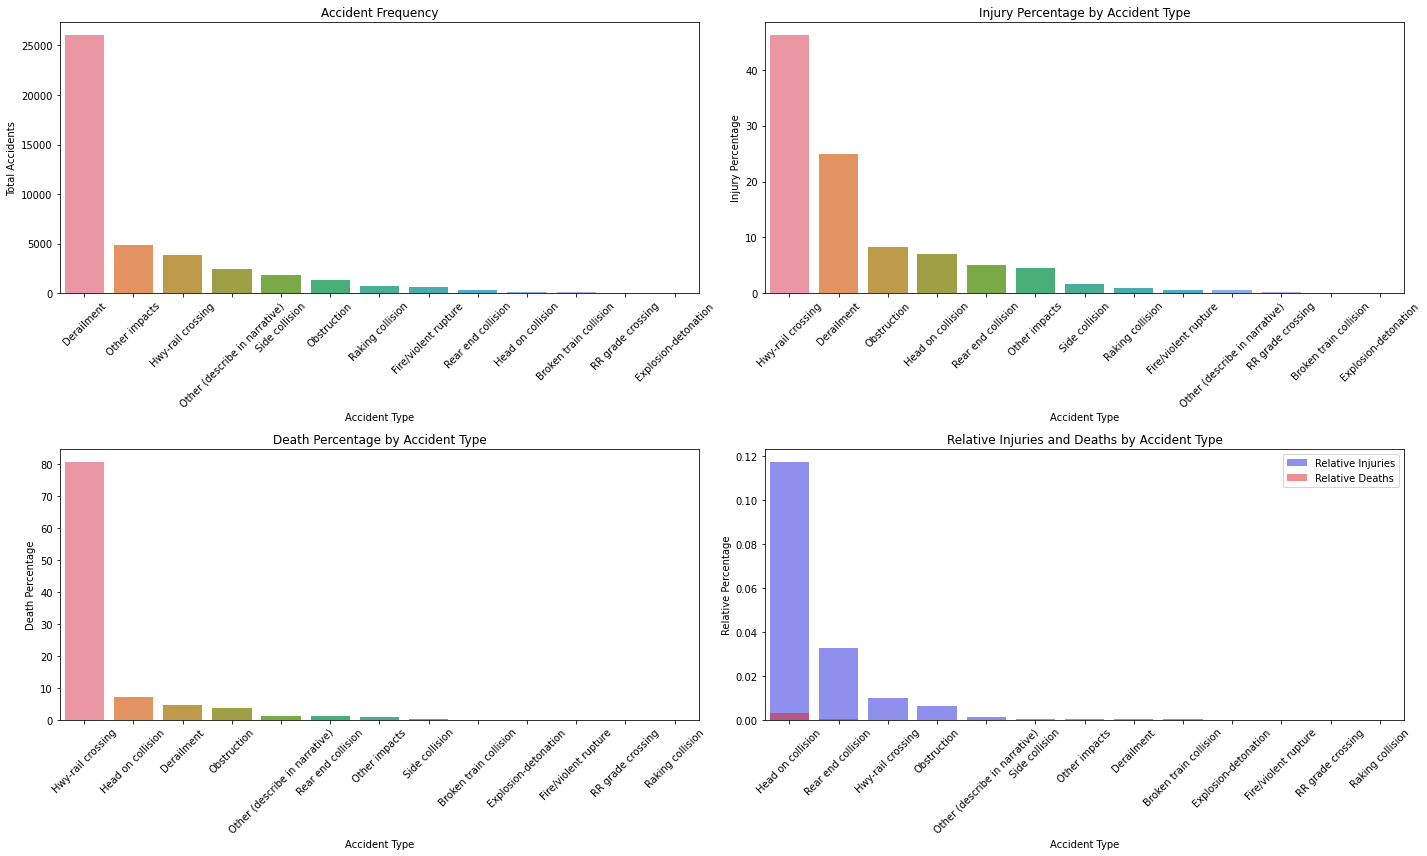

In [20]:
plt.figure(figsize=(20, 12))

# מיון סוגי התאונות
plt.subplot(221)  
sns.countplot(x='Accident Type', data=GOTR_DF, order=GOTR_DF['Accident Type'].value_counts().index)
plt.title('Accident Frequency')
plt.xlabel('Accident Type')
plt.ylabel('Total Accidents')
plt.xticks(rotation=45)

# אחוז אנשים שנפגעו
plt.subplot(222)  
df_injury_percentage = (GOTR_DF.groupby('Accident Type')['Total Persons Injured'].sum() / GOTR_DF['Total Persons Injured'].sum()) * 100
sns.barplot(x=df_injury_percentage.index, y=df_injury_percentage, order=df_injury_percentage.sort_values(ascending=False).index)
plt.title('Injury Percentage by Accident Type')
plt.xlabel('Accident Type')
plt.ylabel('Injury Percentage')
plt.xticks(rotation=45)

# אחוז אנשים שנהרגו
plt.subplot(223)
df_death_percentage = (GOTR_DF.groupby('Accident Type')['Total Persons Killed'].sum() / GOTR_DF['Total Persons Killed'].sum()) * 100
sns.barplot(x=df_death_percentage.index, y=df_death_percentage, order=df_death_percentage.sort_values(ascending=False).index)
plt.title('Death Percentage by Accident Type')
plt.xlabel('Accident Type')
plt.ylabel('Death Percentage')
plt.xticks(rotation=45)

# ממוצע אנשים שנפצעו
plt.subplot(224)   
mean_injury = GOTR_DF.groupby('Accident Type')['Total Persons Injured'].mean()
mean_death = GOTR_DF.groupby('Accident Type')['Total Persons Killed'].mean()
relative_injury = mean_injury / GOTR_DF['Accident Type'].value_counts()
relative_death = mean_death / GOTR_DF['Accident Type'].value_counts()
sns.barplot(x=relative_injury.index, y=relative_injury, color='blue', alpha=0.5, label='Relative Injuries', order=relative_injury.sort_values(ascending=False).index)
sns.barplot(x=relative_death.index, y=relative_death, color='red', alpha=0.5, label='Relative Deaths', order=relative_death.sort_values(ascending=False).index)
plt.xlabel('Accident Type')
plt.ylabel('Relative Percentage')
plt.title('Relative Injuries and Deaths by Accident Type')
plt.legend()
plt.xticks(rotation=45)


plt.tight_layout()
plt.show()

<div style="color:white;display:fill;border-radius:100px;
            background-color:#03112A;font-size:10%; 
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;text-align: center;color:white; border-radius: 5px; padding-top: 5px; padding-bottom: 10px;"><b><b><span style='color:#2ae4f5''></span></b>   </b></p>
</div>

# <b id="section_2">  </b> <b style='color:#F05454'>7.  Observation 1 </b> <b></b> 

<div style="color:white;display:fill;border-radius:100px;
            background-color:#03112A;font-size:10%; 
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;text-align: center;color:white; border-radius: 5px; padding-top: 5px; padding-bottom: 10px;"><b><b><span style='color:#2ae4f5''></span></b>   </b></p>
</div>

In general, the graphs allow us to understand the frequency of accidents, the impact of each accident type on the number of injured and fatalities, and the accidents in which a high number of injuries or fatalities occur relative to other accidents.
From an economic perspective, it is recommended for railway companies to understand why derailments occur at such a high frequency and to send a professional team to minimize such accidents in order to save money on property repairs.
Collisions between railway and road are the type of accident with the highest number of deaths and injuries in proportion to the overall total. The pie chart expands and shows why the percentage is the highest.
The last graph shows the most deadly accident in relative terms.

<div style="color:white;display:fill;border-radius:100px;
            background-color:#03112A;font-size:10%; 
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;text-align: center;color:white; border-radius: 5px; padding-top: 5px; padding-bottom: 10px;"><b><b><span style='color:#2ae4f5''></span></b>   </b></p>
</div>

# <b id="section_2">  </b> <b style='color:#F05454'>8.  pay attention to ratio !  </b> <b></b> 

<div style="color:white;display:fill;border-radius:100px;
            background-color:#03112A;font-size:10%; 
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;text-align: center;color:white; border-radius: 5px; padding-top: 5px; padding-bottom: 10px;"><b><b><span style='color:#2ae4f5''></span></b>   </b></p>
</div>

### Analysis by seasons and weather

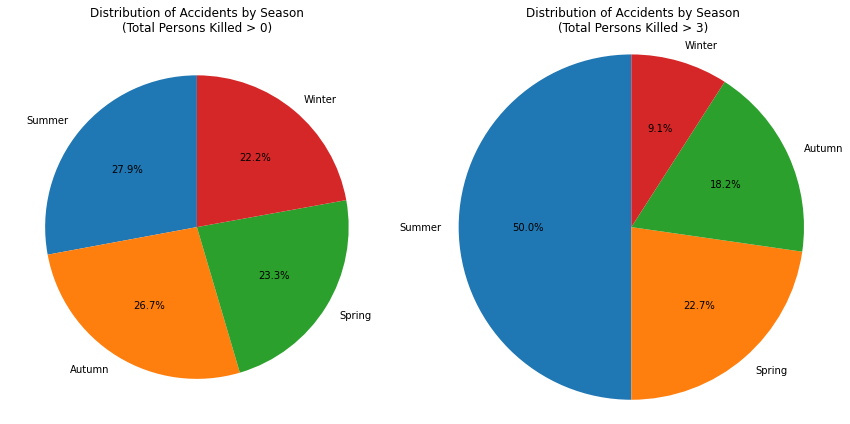

In [21]:
dd=GOTR_DF[GOTR_DF['Total Persons Killed']>0]
dd['Accident Month'].value_counts()
season_counts1 = dd['Season'].value_counts()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.pie(season_counts1, labels=season_counts1.index, autopct='%1.1f%%', startangle=90)
ax1.set_title('Distribution of Accidents by Season\n(Total Persons Killed > 0)')
high_d=GOTR_DF[GOTR_DF['Total Persons Killed']>3]
season_counts2 = high_d['Season'].value_counts()
ax2.pie(season_counts2, labels=season_counts2.index, autopct='%1.1f%%', startangle=90)
ax2.set_title('Distribution of Accidents by Season\n(Total Persons Killed > 3)')

plt.axis('equal')
plt.tight_layout()
plt.show()

we can understand that 50% of the fatal accident(more than 3 killed) happen on summer.

In [22]:
high_d.groupby('Season')[['Train Speed']].mean().reset_index()

,Season,Train Speed
0,Autumn,47.500000
1,Spring,40.600000
2,Summer,35.545455
3,Winter,70.000000


<div style="color:white;display:fill;border-radius:100px;
            background-color:#03112A;font-size:10%; 
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;text-align: center;color:white; border-radius: 5px; padding-top: 5px; padding-bottom: 10px;"><b><b><span style='color:#2ae4f5''></span></b>   </b></p>
</div>

# <b id="section_2">  </b> <b style='color:#F05454'> Ratio check !  </b> <b></b> 

In [23]:
pie_df = GOTR_DF['Season'].value_counts()

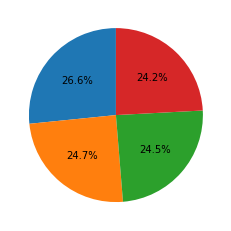

In [24]:
plt.pie(pie_df ,autopct='%1.1f%%', startangle=90);

by checking the cause to the high number of fatal accident on summer we surprized to see that the summer's average speed was actually the lowest.  

<div style="color:white;display:fill;border-radius:100px;
            background-color:#03112A;font-size:10%; 
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;text-align: center;color:white; border-radius: 5px; padding-top: 5px; padding-bottom: 10px;"><b><b><span style='color:#2ae4f5''></span></b>   </b></p>
</div>

In [26]:
high_d['Primary Accident Cause'].value_counts().to_frame()

,Primary Accident Cause
Highway user inattentiveness,8
Highway user misjudgment under normal weather and traffic conditions,3
Highway user deliberately disregarded crossing warning devices,3
Other causes (Provide detailed description in narrative),2
Other train operation/human factors (Provide detailed description in narrative),2
"Fixed signal (other than automatic block or interlocking signal), failure to comply.",2
Interference (other than vandalism) with railroad operations by nonrailroad employee,1
"Train outside yard limits, in block signal or interlocking territory, excessive speed [Desc.Changed",1


<div style="color:white;display:fill;border-radius:100px;
            background-color:#03112A;font-size:10%; 
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;text-align: center;color:white; border-radius: 5px; padding-top: 5px; padding-bottom: 10px;"><b><b><span style='color:#2ae4f5''></span></b>   </b></p>
</div>


# <b id="section_2">  </b> <b style='color:#F05454'>9.  Observation 2 </b> <b></b> 


<div style="color:white;display:fill;border-radius:100px;
            background-color:#03112A;font-size:10%; 
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;text-align: center;color:white; border-radius: 5px; padding-top: 5px; padding-bottom: 10px;"><b><b><span style='color:#2ae4f5''></span></b>   </b></p>
</div>

by checking the kinds of accident we noticed that in most of fatal accident there was a private car involve. we can also see that the common cause to the accidents was Inattention of drivers to the passing trains and the accident killed were the private car drivers themselves.
our hypothesis is that on summer a lot of families travels and the drivers are distracted by their families while driving. in addition, we can undarstand from the right pie chart that the spring holds a high number of accident too, which indicate the fact that the more people travle-the more accident happen.

<a id='top'></a>

<div>
<img src="https://github.com/guzua/Railroad-Accident/blob/main/1.jpg?raw=true" width="300"/>
</div>


המשך מסקנות של הרוגים ביחס למזג אוויר ועונות

<div style="color:white;display:fill;border-radius:100px;
            background-color:#03112A;font-size:10%; 
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;text-align: center;color:white; border-radius: 5px; padding-top: 5px; padding-bottom: 10px;"><b><b><span style='color:#2ae4f5''></span></b>   </b></p>
</div>


# <b id="section_2">  </b> <b style='color:#F05454'>9.2  GPT (?) VS Students </b> <b></b> 


<AxesSubplot:xlabel='Weather Condition', ylabel='Total Persons Injured'>

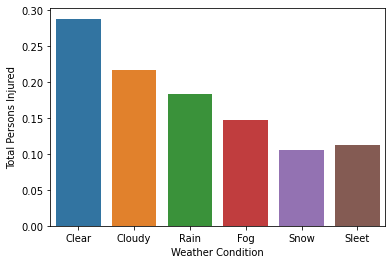

In [28]:
sns.barplot(x='Weather Condition', y='Total Persons Injured', data=GOTR_DF,ci= None,order=["Clear","Cloudy","Rain","Fog","Snow","Sleet"])

<div style="color:white;display:fill;border-radius:100px;
            background-color:#03112A;font-size:10%; 
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;text-align: center;color:white; border-radius: 5px; padding-top: 5px; padding-bottom: 10px;"><b><b><span style='color:#2ae4f5''></span></b>   </b></p>
</div>

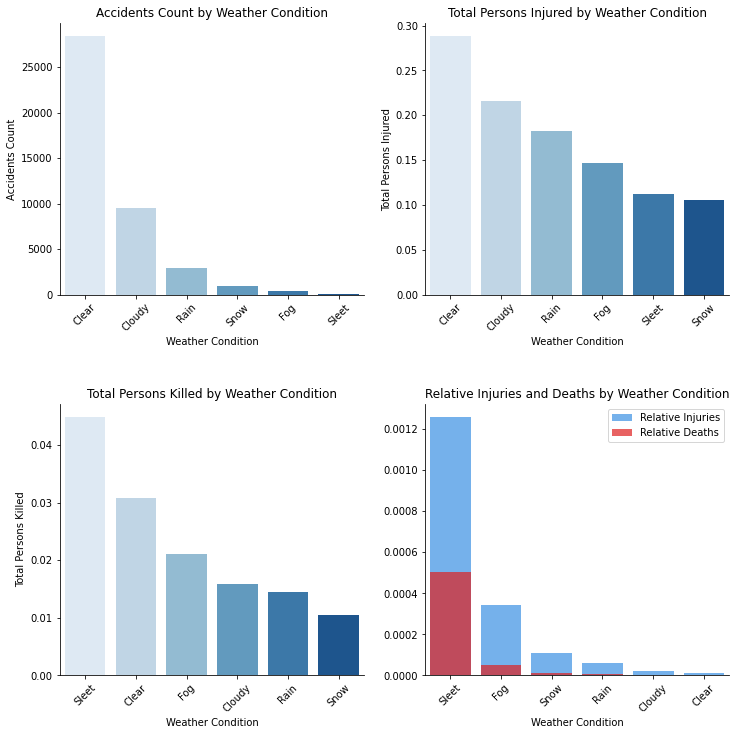

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))

sns.countplot(x='Weather Condition', data=GOTR_DF, order=GOTR_DF['Weather Condition'].value_counts().index, palette='Blues', ax=axes[0, 0])
axes[0, 0].set_title('Accidents Count by Weather Condition')
axes[0, 0].set_xlabel('Weather Condition')
axes[0, 0].set_ylabel('Accidents Count')
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].spines['top'].set_visible(False)
axes[0, 0].spines['right'].set_visible(False)

sns.barplot(x='Weather Condition', y='Total Persons Injured', data=GOTR_DF, order=GOTR_DF.groupby('Weather Condition')['Total Persons Injured'].mean().sort_values(ascending=False).index, palette='Blues', ci=None, ax=axes[0, 1])
axes[0, 1].set_title('Total Persons Injured by Weather Condition')
axes[0, 1].set_xlabel('Weather Condition')
axes[0, 1].set_ylabel('Total Persons Injured')
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].spines['top'].set_visible(False)
axes[0, 1].spines['right'].set_visible(False)

sns.barplot(x='Weather Condition', y='Total Persons Killed', data=GOTR_DF, order=GOTR_DF.groupby('Weather Condition')['Total Persons Killed'].mean().sort_values(ascending=False).index, palette='Blues', ci=None, ax=axes[1, 0])
axes[1, 0].set_title('Total Persons Killed by Weather Condition')
axes[1, 0].set_xlabel('Weather Condition')
axes[1, 0].set_ylabel('Total Persons Killed')
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].spines['top'].set_visible(False)
axes[1, 0].spines['right'].set_visible(False)

mean_injury = GOTR_DF.groupby('Weather Condition')['Total Persons Injured'].mean()
mean_death = GOTR_DF.groupby('Weather Condition')['Total Persons Killed'].mean()
relative_injury = mean_injury / GOTR_DF['Weather Condition'].value_counts()
relative_death = mean_death / GOTR_DF['Weather Condition'].value_counts()
sns.barplot(x=relative_injury.index, y=relative_injury, color='DodgerBlue', alpha=0.7, label='Relative Injuries', order=relative_injury.sort_values(ascending=False).index, ci=None, ax=axes[1, 1])
sns.barplot(x=relative_death.index, y=relative_death, color='Red', alpha=0.7, label='Relative Deaths', order=relative_death.sort_values(ascending=False).index, ci=None, ax=axes[1, 1])
axes[1, 1].set_xlabel('Weather Condition')
axes[1, 1].set_title('Relative Injuries and Deaths by Weather Condition')
axes[1, 1].legend()
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].spines['top'].set_visible(False)
axes[1, 1].spines['right'].set_visible(False)

plt.subplots_adjust(hspace=0.4)
plt.show()

<div style="color:white;display:fill;border-radius:100px;
            background-color:#03112A;font-size:10%; 
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;text-align: center;color:white; border-radius: 5px; padding-top: 5px; padding-bottom: 10px;"><b><b><span style='color:#2ae4f5''></span></b>   </b></p>
</div>


# <b id="section_2">  </b> <b style='color:#F05454'>10.  Observation 3 </b> <b></b> 


<div style="color:white;display:fill;border-radius:100px;
            background-color:#03112A;font-size:10%; 
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;text-align: center;color:white; border-radius: 5px; padding-top: 5px; padding-bottom: 10px;"><b><b><span style='color:#2ae4f5''></span></b>   </b></p>
</div>

These graphs depict the frequency of accidents, the percentage of fatalities and overall injuries, and their ratios in relation to weather conditions. It is evident that the majority of accidents occur in clear weather, which aligns with the logic since most days of the year have such conditions.

An interesting finding reveals that hail has the highest percentage of fatalities, both in total and in relative terms. It would be worth investigating whether it is possible to reduce trips during sleet and perhaps explore alternative modes of transportation during those times to minimize the number of fatalities.

---
---

In [33]:
GOTR_DF['Positive Drug Tests'].value_counts()

0.0    42218
1.0      145
2.0        4
3.0        1
Name: Positive Drug Tests, dtype: int64

In [34]:
GOTR_DF['Positive Drug Tests'].info()

<class 'pandas.core.series.Series'>
Int64Index: 42368 entries, 0 to 46441
Series name: Positive Drug Tests
Non-Null Count  Dtype  
--------------  -----  
42368 non-null  float64
dtypes: float64(1)
memory usage: 662.0 KB


In [35]:
drug.shape

NameError: name 'drug' is not defined

In [36]:
GOTR_DF.shape

(42368, 20)

---
---

### Accidents involving drug use

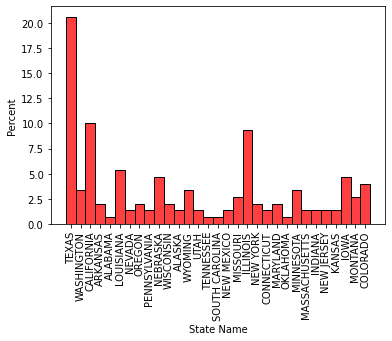

In [38]:
drug=GOTR_DF[(GOTR_DF['Positive Drug Tests']>0)]
sns.histplot(x='State Name',data=drug,stat='percent',color="red")
plt.xticks(rotation=90)
plt.show()

We see that 20% of the accidents where drugs were used, occurred in Texas

<a id='top'></a>

<div>
<img src="https://github.com/guzua/Railroad-Accident/blob/main/2.jpg?raw=true" width="300"/>
</div>


<AxesSubplot:xlabel='Passengers Transported', ylabel='count'>

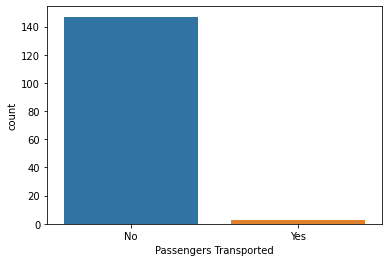

In [40]:
sns.countplot(x='Passengers Transported',data=drug)

We can understand that in almost every accident where one of the employees was under the influence of drugs, there were not passengers on the train. which means that the employees take more responsiblity when they know there are passengers on the train.

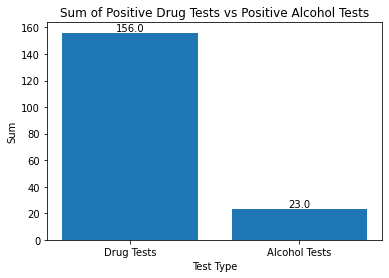

In [41]:
sum_drug=GOTR_DF['Positive Drug Tests'].sum()
sum_alc=GOTR_DF['Positive Alcohol Tests'].sum()
labels = ['Drug Tests', 'Alcohol Tests']
values = [sum_drug, sum_alc]
plt.bar(labels, values)
for i, v in enumerate(values):
    plt.text(i, v, str(v), ha='center', va='bottom')
plt.title('Sum of Positive Drug Tests vs Positive Alcohol Tests')
plt.xlabel('Test Type')
plt.ylabel('Sum')
plt.show()

<div style="color:white;display:fill;border-radius:100px;
            background-color:#03112A;font-size:10%; 
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;text-align: center;color:white; border-radius: 5px; padding-top: 5px; padding-bottom: 10px;"><b><b><span style='color:#2ae4f5''></span></b>   </b></p>
</div>

# <b id="section_2">  </b> <b style='color:#F05454'>11. Another angle for analysis - coordinates </b> <b></b> 

<div style="color:white;display:fill;border-radius:100px;
            background-color:#03112A;font-size:10%; 
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;text-align: center;color:white; border-radius: 5px; padding-top: 5px; padding-bottom: 10px;"><b><b><span style='color:#2ae4f5''></span></b>   </b></p>
</div>

### Analysis by location

In [42]:
most_common_coordinates = GOTR_DF.groupby(['Latitude', 'Longitude']).size().nlargest(12).reset_index()
most_common_coordinates = most_common_coordinates[~((most_common_coordinates['Latitude'] == 0) & (most_common_coordinates['Longitude'] == 0))]
# The `~` operator is used to negate the condition inside the parentheses
most_common_coordinates.columns = ['Latitude', 'Longitude', 'Count']
most_common_coordinates

,Latitude,Longitude,Count
0,42.565903,-73.854184,84
1,39.759791,-86.327526,76
2,33.548905,-86.678010,70
3,36.112142,-86.770737,63
4,41.677360,-85.978495,53
5,31.213524,-82.353588,49
6,40.672361,-80.251826,40
7,40.672356,-80.251823,39
8,41.677391,-85.978436,39
9,33.543607,-86.790089,37


In [43]:
import folium

# Create a map centered at the first coordinate
map_center = [42.565903, -73.854184]
m = folium.Map(location=map_center, zoom_start=6)

# Add markers for each coordinate
coordinates = [
    {'latitude': 42.565903, 'longitude': -73.854184},
    {'latitude': 39.759791, 'longitude': -86.327526},
    {'latitude': 33.548905, 'longitude': -86.67801},
    {'latitude': 36.112142, 'longitude': -86.770737},
    {'latitude': 41.67736, 'longitude': -85.978495},
    {'latitude': 31.213524, 'longitude': -82.353588},
    {'latitude': 40.672361, 'longitude': -80.251826},
    {'latitude': 40.672356, 'longitude': -80.251823},
    {'latitude': 41.677391, 'longitude': -85.978436},
    {'latitude': 33.543607, 'longitude': -86.790089},
    {'latitude': 42.566588, 'longitude': -73.852296}
]

for coord in coordinates:
    lat = coord['latitude']
    lon = coord['longitude']
    marker = folium.Marker([lat, lon])
    marker.add_to(m)

# Display the map
m


הצגה גרפית 

In [44]:
GOTR_DF['coordinate'] = GOTR_DF['Latitude'].astype(str) + ', ' + GOTR_DF['Longitude'].astype(str)
coordinate=GOTR_DF[GOTR_DF["coordinate"] != "0.0, nan"]
most_common_coordinate = coordinate['coordinate'].value_counts().head(10)
most_common_coordinate
# value_counts to coordinates to str - helps to plt show the X labels 

42.565903, -73.854184            84
39.759791, -86.327526            76
33.548905, -86.67801             70
36.112142, -86.77073699999998    63
41.67736, -85.97849499999998     53
31.213524, -82.353588            49
40.672361, -80.25182599999998    40
40.672356, -80.251823            39
41.677391, -85.978436            39
33.543607, -86.79008899999998    37
Name: coordinate, dtype: int64

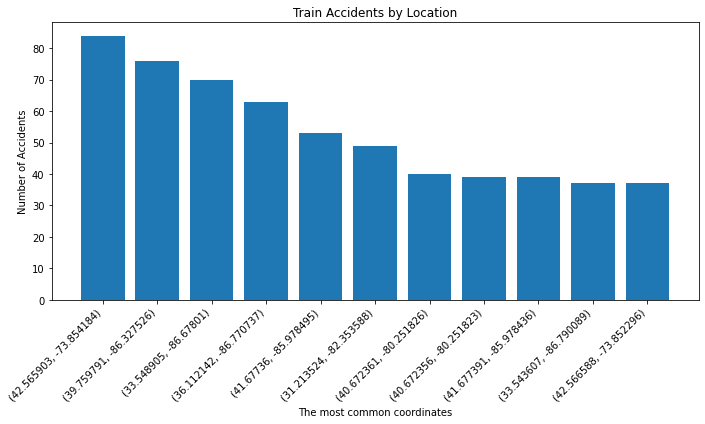

In [46]:


data = {
    'Latitude': [42.565903, 39.759791, 33.548905, 36.112142, 41.67736, 31.213524, 40.672361, 40.672356, 41.677391, 33.543607, 42.566588],
    'Longitude': [-73.854184, -86.327526, -86.678010, -86.770737, -85.978495, -82.353588, -80.251826, -80.251823, -85.978436, -86.790089, -73.852296],
    'Number of Accidents': [84, 76, 70, 63, 53, 49, 40, 39, 39, 37, 37]
}

df = pd.DataFrame(data)

# Create the bar graph
plt.figure(figsize=(10, 6))
plt.bar(range(len(df)), df['Number of Accidents'])
plt.xlabel('The most common coordinates')
plt.ylabel('Number of Accidents')
plt.title('Train Accidents by Location')

# Set the x-axis tick labels to be the coordinates
plt.xticks(range(len(df)), [f'({lat}, {lon})' for lat, lon in zip(df['Latitude'], df['Longitude'])], rotation=45, ha='right')

# Display the graph
plt.tight_layout()
plt.show()



<div style="color:white;display:fill;border-radius:100px;
            background-color:#03112A;font-size:10%; 
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;text-align: center;color:white; border-radius: 5px; padding-top: 5px; padding-bottom: 10px;"><b><b><span style='color:#2ae4f5''></span></b>   </b></p>
</div>

# <b id="section_2">  </b> <b style='color:#F05454'>11. Read this </b> <b></b> 

<div style="color:white;display:fill;border-radius:100px;
            background-color:#03112A;font-size:10%; 
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;text-align: center;color:white; border-radius: 5px; padding-top: 5px; padding-bottom: 10px;"><b><b><span style='color:#2ae4f5''></span></b>   </b></p>
</div>

Now we see the most common coordinate. In addition, when you look at the first and last coordinate, you realize that they are in the same position
We chose to focus on 2 coordinates, the first one is the most common coordinate and second is the 11's which is actually on the same location.

In [47]:

from IPython.display import Markdown, display

image_url = "https://github.com/guzua/Railroad-Accident/blob/main/%D7%A7%D7%95%D7%A8%D7%93%D7%99%D7%A0%D7%98%D7%95%D7%AA%20%D7%9E%D7%A2%D7%95%D7%93%D7%9B%D7%9F.png?raw=true"
display(Image(url=image_url))



In [48]:
coordinate123 = GOTR_DF[(GOTR_DF["coordinate"] == "42.565903, -73.854184") | (GOTR_DF["coordinate"] == "42.566588, -73.85229599999998")]


<div style="color:white;display:fill;border-radius:100px;
            background-color:#03112A;font-size:10%; 
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;text-align: center;color:white; border-radius: 5px; padding-top: 5px; padding-bottom: 10px;"><b><b><span style='color:#2ae4f5''></span></b>   </b></p>
</div>


</b> <b style='color:#F05454'>12. There is a column in the data that describes the cause of the accident - they were able to use this column for very important conclusions </b> <b></b> 


<div style="color:white;display:fill;border-radius:100px;
            background-color:#03112A;font-size:10%; 
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;text-align: center;color:white; border-radius: 5px; padding-top: 5px; padding-bottom: 10px;"><b><b><span style='color:#2ae4f5''></span></b>   </b></p>
</div>

In [49]:
coordinate123['Primary Accident Cause'].value_counts()

Automatic hump retarder failed to sufficiently slow car due to foreign material on wheels of car bei    16
Interaction of lateral/vertical forces (includes harmonic rock off)                                      8
Classification yard automatic control system - Inadequate or insufficient control  (e.g., automatic      8
Computer system design error (vendor)                                                                    7
Passed couplers (automated classification yard)                                                          6
Shoving movement, absence of man on or at leading end of movement                                        5
Instruction to train/yard crew improper                                                                  5
Failure to comply with restricted speed or its equivalent not in connection with a block or interloc     5
Manual intervention of classification yard automatic control system modes by operator                    4
Humping or cutting off in motion equi

<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:250%; 
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;text-align: center;color:white; border-radius: 20px; padding-top: 20px; padding-bottom: 20px;"><b><b><span style='color:#2ae4f5''></span></b> ⚠️ Warning: Big mistake. ⚠️ </b></p>
</div>

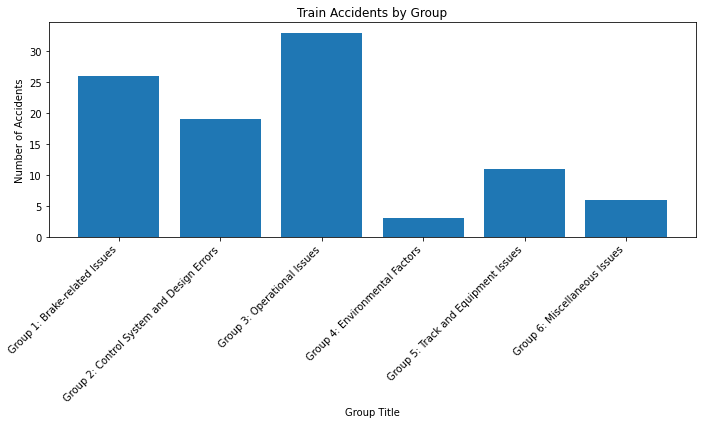

In [50]:
group_titles = [
    "Group 1: Brake-related Issues",
    "Group 2: Control System and Design Errors",
    "Group 3: Operational Issues",
    "Group 4: Environmental Factors",
    "Group 5: Track and Equipment Issues",
    "Group 6: Miscellaneous Issues"
]
num_accidents = [26, 19, 33, 3, 11, 6]

# Create the dataframe
df = pd.DataFrame({
    'Group Title': group_titles,
    'Number of Accidents': num_accidents
})


plt.figure(figsize=(10, 6))
plt.bar(df['Group Title'], df['Number of Accidents'])
plt.xlabel('Group Title')
plt.ylabel('Number of Accidents')
plt.title('Train Accidents by Group')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Display the graph
plt.tight_layout()
plt.show()



<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:250%; 
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;text-align: center;color:white; border-radius: 20px; padding-top: 20px; padding-bottom: 20px;"><b><b><span style='color:#2ae4f5''></span></b> ⚠️ Warning: Big mistake. ⚠️ </b></p>
</div>

so we saw the accident causes and we separated them by main groups. we can see that the common issues are damaged tracks and a wrong maintenance of the trains.

In [51]:
coordinate123['Maintenance Railroad Holding Company'].value_counts()

CSX Transportation    121
Name: Maintenance Railroad Holding Company, dtype: int64

In [52]:

from IPython.display import Markdown, display

image_url = "https://github.com/guzua/Railroad-Accident/blob/main/%D7%A7%D7%95%D7%A8%D7%93%D7%99%D7%A0%D7%98%D7%94%20+%20%D7%9E%D7%A8%D7%97%D7%A7%20+%20%D7%97%D7%91%D7%A8%D7%AA%20%D7%90%D7%97%D7%96%D7%A7%D7%94.png?raw=true"
display(Image(url=image_url))



we can see that CSX company who's in charge of the train's maintenace-has 4 factories on the accident area. which means that there are a good chances for damaged trailers or oil leaks as a result of the factor's location. in addition, the maintences people do not do their job propely and dont pay enought attenion to the accidents and to the reason there are so many accidents on the same location. our recomandation to CSX is to always check if everythings is ok and that there are no damages on the trains.

#### During the work we used AI software. such as the "Leonardo" image generator and chat GPT